In [271]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt      #Importing graph plot library
%matplotlib inline

In [601]:
df=pd.read_csv('cars_tab7.csv')   #Importing training dataset
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,price,variant,Mode,Fuel,Year,Location,Models,KM
0,0,0.0,0.0,0.0,0.0,"₹4,15,000",VXI MANUAL,MANUAL,Petrol,January 2012,DELHI,2012 Maruti Ertiga VXI MANUAL,"37,786 km"
1,1,1.0,1.0,1.0,1.0,"₹3,99,142",1.5 TREND TDCI MANUAL,MANUAL,Diesel,January 2014,DELHI,2014 Ford Ecosport 1.5 TREND TDCI MANUAL,"47,562 km"
2,2,2.0,2.0,2.0,2.0,"₹4,55,000",1.5 S I DTEC MANUAL,MANUAL,Diesel,January 2015,DELHI,2015 Honda Mobilio 1.5 S I DTEC MANUAL,"52,945 km"
3,3,3.0,3.0,3.0,3.0,"₹18,00,000",2.4 VX 7 STR MANUAL,MANUAL,Diesel,May 2019,DELHI,2019 Toyota Innova Crysta 2.4 VX 7 STR MANUAL,"31,235 km"
4,4,4.0,4.0,4.0,4.0,"₹10,00,000",ZDI PLUS MANUAL,MANUAL,Diesel,July 2019,DELHI,2019 Maruti Ertiga ZDI PLUS MANUAL,"30,079 km"
5,5,5.0,5.0,5.0,5.0,"₹7,60,000",1.5 TITANIUM TI VCT AT AUTOMATIC,AUTOMATIC,Petrol,July 2017,DELHI,2017 Ford Ecosport 1.5 TITANIUM TI VCT AT AUTO...,"35,515 km"
6,6,6.0,6.0,6.0,6.0,"₹2,35,000",C6 MANUAL,MANUAL,Diesel,October 2012,DELHI,2012 Mahindra Quanto C6 MANUAL,"98,051 km"
7,7,7.0,7.0,7.0,7.0,"₹8,10,000",S6 PLUS MANUAL,MANUAL,Diesel,February 2016,DELHI,2016 Mahindra Scorpio S6 PLUS MANUAL,"73,732 km"
8,8,8.0,8.0,8.0,8.0,"₹5,25,000",1.5TITANIUM TDCI MANUAL,MANUAL,Diesel,February 2014,DELHI,2014 Ford Ecosport 1.5TITANIUM TDCI MANUAL,"73,120 km"
9,9,9.0,9.0,9.0,9.0,"₹8,30,000",S4PLUS MANUAL,MANUAL,Diesel,May 2016,DELHI,2016 Mahindra Scorpio S4PLUS MANUAL,"55,875 km"


DATA CLEANING

In [602]:
df.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1','Unnamed: 0.1.1.1.1'],axis=1,inplace=True)

In [603]:
df=df.replace('-',np.nan)

In [604]:
df.sample()

,price,variant,Mode,Fuel,Year,Location,Models,KM
582,"₹2,68,099",MAGNA 1.4 CRDI MANUAL,MANUAL,Diesel,November 2012,DELHI,2012 Hyundai i20 MAGNA 1.4 CRDI MANUAL,"60,022 km"


In [605]:
df.isna().sum()

price        73
variant      73
Mode        241
Fuel        709
Year        865
Location     96
Models      709
KM          709
dtype: int64

In [606]:
df=df[df.isnull().sum(axis=1)<4]

In [607]:
df.isna().sum()

price         0
variant       0
Mode        131
Fuel          0
Year        156
Location     16
Models        0
KM            0
dtype: int64

In [608]:
df.shape

(2891, 8)

In [609]:
df['Mode']=df['Mode'].fillna(df['Mode'].mode()[0])

In [610]:
df.isna().sum()

price         0
variant       0
Mode          0
Fuel          0
Year        156
Location     16
Models        0
KM            0
dtype: int64

In [611]:
df=df.fillna(method='ffill')

In [612]:
df.isna().sum()

price       0
variant     0
Mode        0
Fuel        0
Year        0
Location    0
Models      0
KM          0
dtype: int64

In [613]:
df['Year']=df['Year'].str.extract('(\d+)')

In [614]:
import re

In [615]:
df['KM']=df['KM'].str.replace(r'\D','')

In [616]:
df['Models']=df['Models'].str.replace(r'\b[0-9]{4}','')

In [617]:
df.reset_index(drop=True,inplace=True)

In [618]:
df

,price,variant,Mode,Fuel,Year,Location,Models,KM
0,"₹4,15,000",VXI MANUAL,MANUAL,Petrol,2012,DELHI,Maruti Ertiga VXI MANUAL,37786
1,"₹3,99,142",1.5 TREND TDCI MANUAL,MANUAL,Diesel,2014,DELHI,Ford Ecosport 1.5 TREND TDCI MANUAL,47562
2,"₹4,55,000",1.5 S I DTEC MANUAL,MANUAL,Diesel,2015,DELHI,Honda Mobilio 1.5 S I DTEC MANUAL,52945
3,"₹18,00,000",2.4 VX 7 STR MANUAL,MANUAL,Diesel,2019,DELHI,Toyota Innova Crysta 2.4 VX 7 STR MANUAL,31235
4,"₹10,00,000",ZDI PLUS MANUAL,MANUAL,Diesel,2019,DELHI,Maruti Ertiga ZDI PLUS MANUAL,30079
...,...,...,...,...,...,...,...,...
2886,"₹4,26,399",HIGHLINE1.2L PETROL MANUAL,MANUAL,Petrol,2015,MUMBAI,Volkswagen Polo HIGHLINE1.2L PETROL MANUAL,46554
2887,"₹6,03,399",RS 1.0 PETROL,MANUAL,Petrol,2017,MUMBAI,Maruti Baleno RS 1.0 PETROL,29429
2888,"₹3,17,099",1.0 RXT MANUAL,MANUAL,Petrol,2017,MUMBAI,Renault Kwid 1.0 RXT MANUAL,29693
2889,"₹2,39,299",MAGNA 1.2 KAPPA2 MANUAL,MANUAL,Petrol,2011,MUMBAI,Hyundai i10 MAGNA 1.2 KAPPA2 MANUAL,63784


In [619]:
df['model']=df['Models'].str.split().str.get(0)

In [620]:
df.drop(['Models'],axis=1,inplace=True)

In [621]:
df

,price,variant,Mode,Fuel,Year,Location,KM,model
0,"₹4,15,000",VXI MANUAL,MANUAL,Petrol,2012,DELHI,37786,Maruti
1,"₹3,99,142",1.5 TREND TDCI MANUAL,MANUAL,Diesel,2014,DELHI,47562,Ford
2,"₹4,55,000",1.5 S I DTEC MANUAL,MANUAL,Diesel,2015,DELHI,52945,Honda
3,"₹18,00,000",2.4 VX 7 STR MANUAL,MANUAL,Diesel,2019,DELHI,31235,Toyota
4,"₹10,00,000",ZDI PLUS MANUAL,MANUAL,Diesel,2019,DELHI,30079,Maruti
...,...,...,...,...,...,...,...,...
2886,"₹4,26,399",HIGHLINE1.2L PETROL MANUAL,MANUAL,Petrol,2015,MUMBAI,46554,Volkswagen
2887,"₹6,03,399",RS 1.0 PETROL,MANUAL,Petrol,2017,MUMBAI,29429,Maruti
2888,"₹3,17,099",1.0 RXT MANUAL,MANUAL,Petrol,2017,MUMBAI,29693,Renault
2889,"₹2,39,299",MAGNA 1.2 KAPPA2 MANUAL,MANUAL,Petrol,2011,MUMBAI,63784,Hyundai


In [622]:
df['variant']=df['variant'].str.rsplit(' ',1).str[0]

In [623]:
df['price']=df['price'].replace({'\₹':''},regex=True)

In [624]:
df

,price,variant,Mode,Fuel,Year,Location,KM,model
0,"4,15,000",VXI,MANUAL,Petrol,2012,DELHI,37786,Maruti
1,"3,99,142",1.5 TREND TDCI,MANUAL,Diesel,2014,DELHI,47562,Ford
2,"4,55,000",1.5 S I DTEC,MANUAL,Diesel,2015,DELHI,52945,Honda
3,"18,00,000",2.4 VX 7 STR,MANUAL,Diesel,2019,DELHI,31235,Toyota
4,"10,00,000",ZDI PLUS,MANUAL,Diesel,2019,DELHI,30079,Maruti
...,...,...,...,...,...,...,...,...
2886,"4,26,399",HIGHLINE1.2L PETROL,MANUAL,Petrol,2015,MUMBAI,46554,Volkswagen
2887,"6,03,399",RS 1.0,MANUAL,Petrol,2017,MUMBAI,29429,Maruti
2888,"3,17,099",1.0 RXT,MANUAL,Petrol,2017,MUMBAI,29693,Renault
2889,"2,39,299",MAGNA 1.2 KAPPA2,MANUAL,Petrol,2011,MUMBAI,63784,Hyundai


In [625]:
df.dtypes

price       object
variant     object
Mode        object
Fuel        object
Year        object
Location    object
KM          object
model       object
dtype: object

In [626]:
df['price']=df['price'].str.replace(',','')

In [627]:
df['price']=df['price'].astype('float')

In [628]:
df['KM']=df['KM'].astype('float')

EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

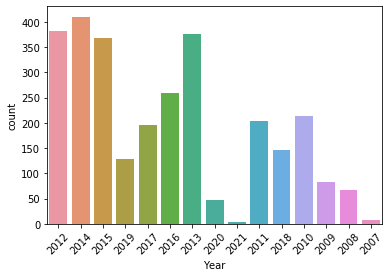

In [629]:
sns.countplot(df['Year'])
plt.xticks(rotation=45)

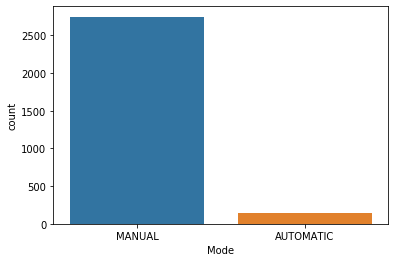

In [630]:
sns.countplot(df['Mode'])

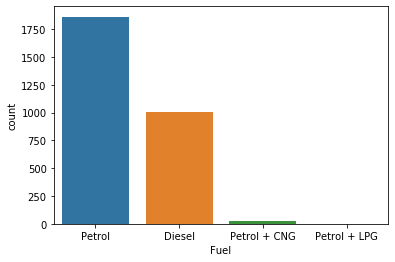

In [631]:
sns.countplot(df['Fuel'])


In [632]:
car_data=['variant','Mode','Fuel','Year','Location','model']

In [633]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in car_data:
    df[col] = le.fit_transform(df[col])

In [634]:
df

,price,variant,Mode,Fuel,Year,Location,KM,model
0,415000.0,285,1,1,5,1,37786.0,12
1,399142.0,48,1,0,7,1,47562.0,5
2,455000.0,39,1,0,8,1,52945.0,6
3,1800000.0,72,1,0,12,1,31235.0,18
4,1000000.0,319,1,0,12,1,30079.0,12
...,...,...,...,...,...,...,...,...
2886,426399.0,165,1,1,8,4,46554.0,19
2887,603399.0,200,1,1,10,4,29429.0,12
2888,317099.0,3,1,1,10,4,29693.0,15
2889,239299.0,191,1,1,4,4,63784.0,7


In [635]:
y=df['price']
x=df.drop(['price'],axis=1)

In [636]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [637]:
x

,variant,Mode,Fuel,Year,Location,KM,model
0,0.890385,0.229791,0.684317,-0.658216,-0.238251,-0.481318,0.337681
1,-2.039409,0.229791,-1.344770,0.058103,-0.238251,-0.204145,-1.794501
2,-2.150667,0.229791,-1.344770,0.416263,-0.238251,-0.051524,-1.489903
3,-1.742721,0.229791,-1.344770,1.848902,-0.238251,-0.667055,2.165264
4,1.310693,0.229791,-1.344770,1.848902,-0.238251,-0.699830,0.337681
...,...,...,...,...,...,...,...
2886,-0.593055,0.229791,0.684317,0.416263,1.998058,-0.232725,2.469862
2887,-0.160385,0.229791,0.684317,1.132583,1.998058,-0.718260,0.337681
2888,-2.595699,0.229791,0.684317,1.132583,1.998058,-0.710774,1.251472
2889,-0.271643,0.229791,0.684317,-1.016376,1.998058,0.255787,-1.185306


In [638]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [639]:
lr=LinearRegression()

In [640]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    rscore=r2_score(y_test,predlr)
    if rscore>maxr2:
        maxr2=rscore
        maxRS=i
print("Best r score is ",maxr2," on Random_state ",maxRS)

Best r score is  0.43756998766886157  on Random_state  82
